In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('employee_experience_survey_data.csv')

In [3]:
df.head()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


In [4]:
df.columns

Index(['Name', 'Age Bracket', 'Gender', 'Ethnicity', 'Job Title', 'Department',
       'Date Survey Completed', 'Job Satisfaction', 'Work-Life Balance',
       'Management Support', 'Team Collaboration', 'Workload Fairness',
       'Career Development Opportunities', 'Workplace Inclusivity',
       'Company Communication', 'Compensation Satisfaction', 'Job Security',
       'Overall Engagement'],
      dtype='object')

In [5]:
df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
Disagree,4
Agree,4
Neutral,3
Strongly Agree,2
Strongly Disagree,2


In [6]:
df['Overall Engagement'].value_counts()

,count
Overall Engagement,
Strongly Agree,4
Neutral,4
Disagree,3
Agree,3
Strongly Disagree,1


In [7]:
# Converting the string to numerical values for mean, median, mode, standard deviation
df['Job Satisfaction'].replace(to_replace = 'Disagree', value = 1, inplace=True)
df['Job Satisfaction'].replace(to_replace = 'Agree', value = 0, inplace=True)
df['Job Satisfaction'].replace(to_replace = 'Neutral', value = 2, inplace=True)
df['Job Satisfaction'].replace(to_replace = 'Strongly Agree', value = 3, inplace=True)
df['Job Satisfaction'].replace(to_replace = 'Strongly Disagree', value = 4, inplace=True)

<ipython-input-7-6fa59482af4d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job Satisfaction'].replace(to_replace = 'Disagree', value = 1, inplace=True)
<ipython-input-7-6fa59482af4d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [8]:
df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
1,4
0,4
2,3
3,2
4,2


In [9]:
df['Job Satisfaction'].mean()

1.6

In [10]:
df['Job Satisfaction'].median()

1.0

In [11]:
df['Job Satisfaction'].mode()

,Job Satisfaction
0,0
1,1


In [12]:
df['Job Satisfaction'].std()

1.4040757000349275

In [13]:
# Converting the string to numerical values for mean, median, mode, standard deviation
df['Overall Engagement'].replace(to_replace = 'Agree', value = 0, inplace=True)
df['Overall Engagement'].replace(to_replace = 'Disagree', value = 1, inplace=True)
df['Overall Engagement'].replace(to_replace = 'Neutral', value = 2, inplace=True)
df['Overall Engagement'].replace(to_replace = 'Strongly Agree', value = 3, inplace=True)
df['Overall Engagement'].replace(to_replace = 'Strongly Disagree', value = 4, inplace=True)

<ipython-input-13-3a66a3141802>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Overall Engagement'].replace(to_replace = 'Agree', value = 0, inplace=True)
<ipython-input-13-3a66a3141802>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [14]:
df['Overall Engagement'].mean()

1.8

In [15]:
df['Overall Engagement'].median()

2.0

In [16]:
df['Overall Engagement'].mode()

,Overall Engagement
0,2
1,3


In [17]:
df['Overall Engagement'].std()

1.2649110640673518

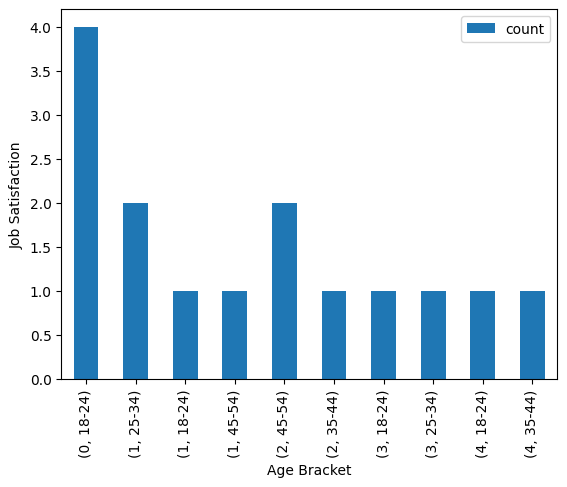

In [18]:
jobsatisfaction_by_age = df.groupby("Job Satisfaction")["Age Bracket"].value_counts()
jobsatisfaction_by_age = jobsatisfaction_by_age.plot(kind='bar')
plt.xlabel("Age Bracket")
plt.ylabel("Job Satisfaction")
plt.legend()
plt.show()

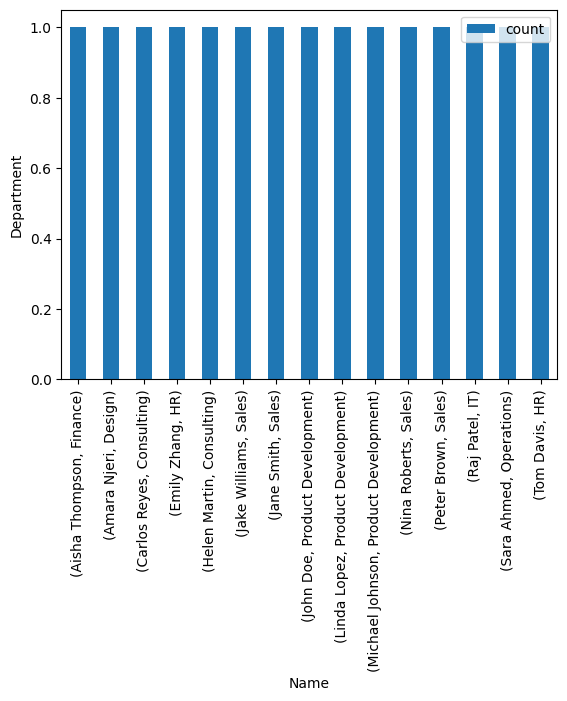

In [19]:
departmentsatisfy_by_Name = df.groupby('Name')['Department'].value_counts()
departmentsatisfy_by_Name = departmentsatisfy_by_Name.plot(kind = 'bar')
plt.xlabel('Name')
plt.ylabel('Department')
plt.legend()
plt.show()

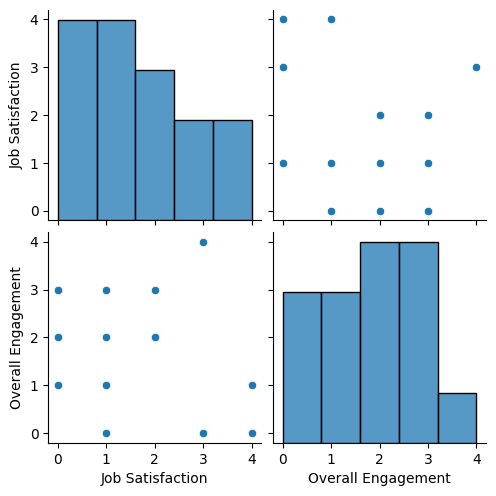

In [20]:
sns.pairplot(df)

<Axes: ylabel='Count'>

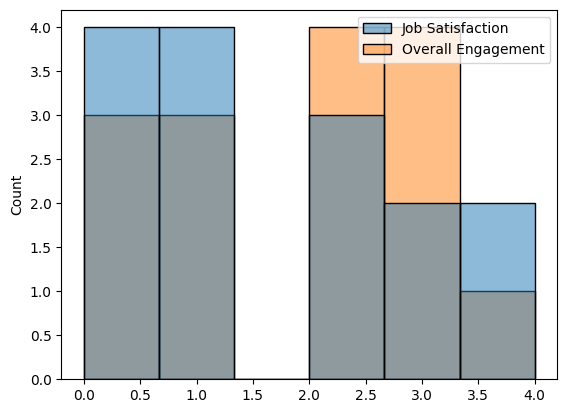

In [21]:
sns.histplot(df)

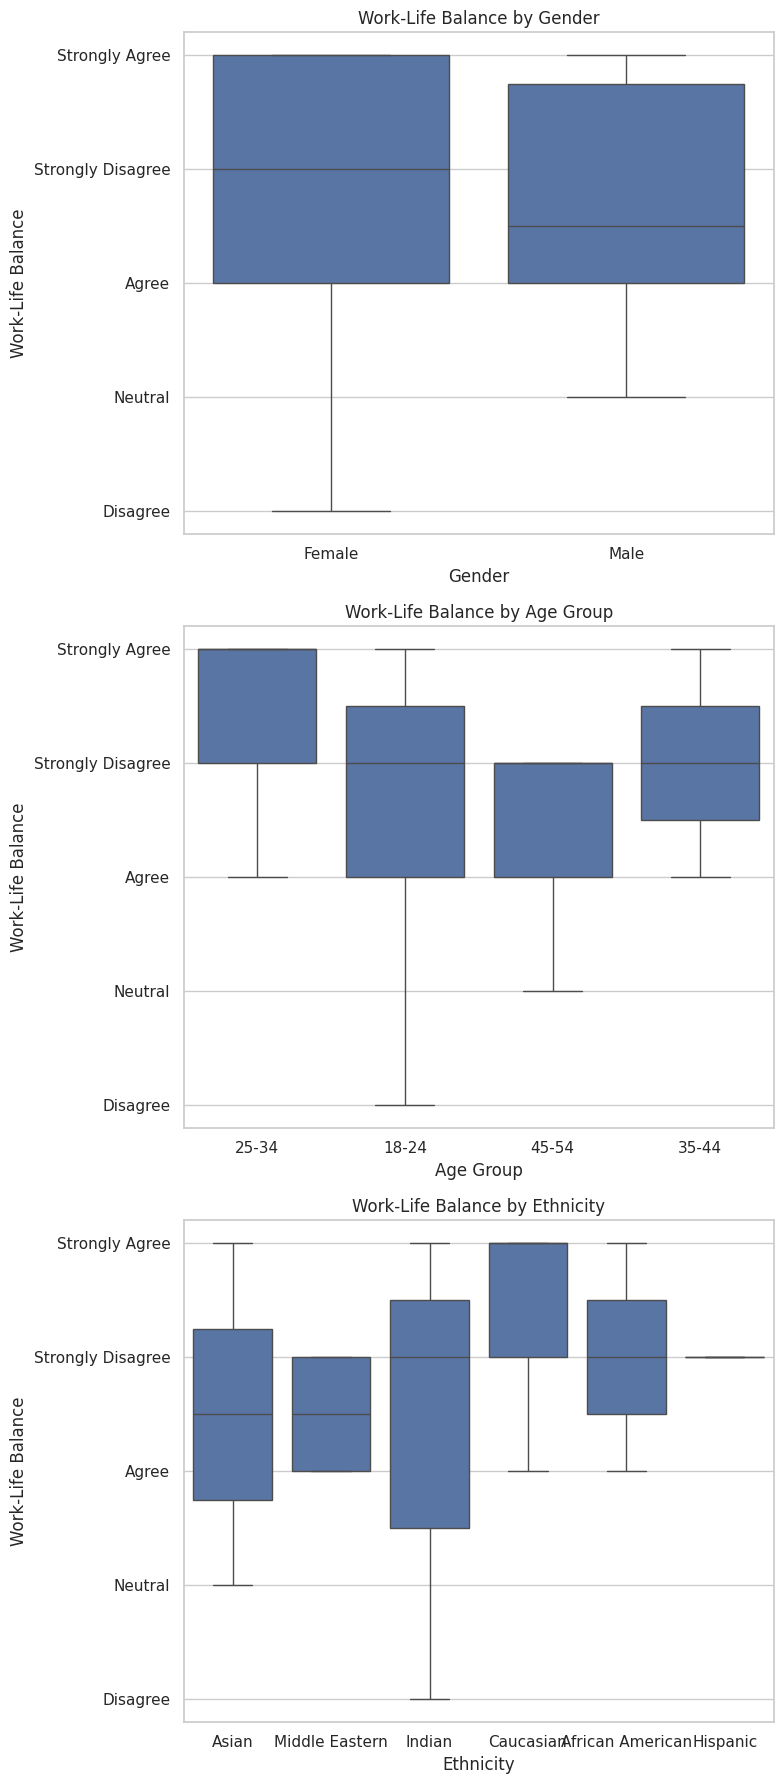

In [22]:
# we can see in  the below boxplot how the work life balance varries accordingly
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))   # Create subplots: 1 row, 3 columns

#Work-Life Balance by Gender
sns.boxplot(ax=axes[0], x='Gender', y='Work-Life Balance', data=df)
axes[0].set_title('Work-Life Balance by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Work-Life Balance')

#Work-Life Balance by Age Group
sns.boxplot(ax=axes[1], x='Age Bracket', y='Work-Life Balance', data=df)
axes[1].set_title('Work-Life Balance by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Work-Life Balance')

#Work-Life Balance by Ethnicity
sns.boxplot(ax=axes[2], x='Ethnicity', y='Work-Life Balance', data=df)
axes[2].set_title('Work-Life Balance by Ethnicity')
axes[2].set_xlabel('Ethnicity')
axes[2].set_ylabel('Work-Life Balance')

plt.tight_layout()
plt.show()

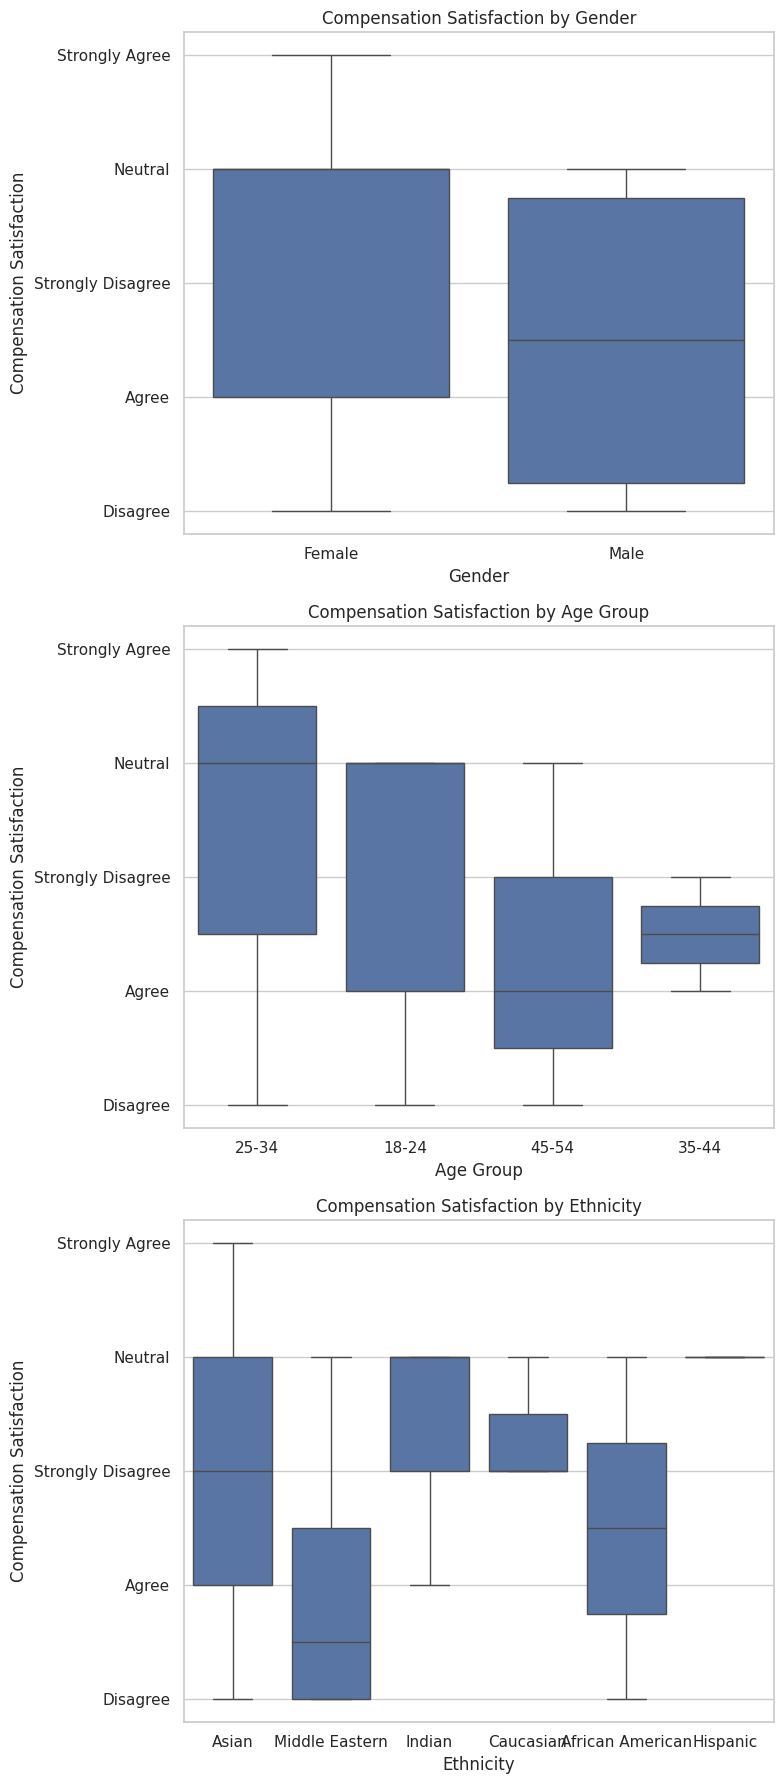

In [23]:
# we can see in  the below boxplot how the Compensation Satisfaction varries accordingly
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))   # Create subplots: 1 row, 3 columns

#Work-Life Balance by Gender
sns.boxplot(ax=axes[0], x='Gender', y='Compensation Satisfaction', data=df)
axes[0].set_title('Compensation Satisfaction by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Compensation Satisfaction')

#Work-Life Balance by Age Group
sns.boxplot(ax=axes[1], x='Age Bracket', y='Compensation Satisfaction', data=df)
axes[1].set_title('Compensation Satisfaction by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Compensation Satisfaction')

#Work-Life Balance by Ethnicity
sns.boxplot(ax=axes[2], x='Ethnicity', y='Compensation Satisfaction', data=df)
axes[2].set_title('Compensation Satisfaction by Ethnicity')
axes[2].set_xlabel('Ethnicity')
axes[2].set_ylabel('Compensation Satisfaction')

plt.tight_layout()
plt.show()

In [24]:
# Filter the data for the two departments: IT and HR
it_dept = df[df['Department'] == 'IT']['Job Satisfaction']
hr_dept = df[df['Department'] == 'HR']['Job Satisfaction']

# Conduct the t-test
t_stat, p_val = stats.ttest_ind(it_dept, hr_dept)

# Output the test results
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 1.7320508075688774, P-value: 0.33333333333333326


In [25]:
# Interpret the result based on p-value
alpha = 0.05  # Significance level
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in job satisfaction between IT and HR departments.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in job satisfaction between IT and HR departments.")

Fail to reject the null hypothesis: There is no significant difference in job satisfaction between IT and HR departments.


In [28]:
df['Work-Life Balance'].value_counts()

,count
Work-Life Balance,
Strongly Agree,5
Strongly Disagree,4
Agree,4
Neutral,1
Disagree,1


In [27]:
df['Overall Engagement'].value_counts()

,count
Overall Engagement,
3,4
2,4
1,3
0,3
4,1


In [29]:
# Converting the string to numerical values for mean, median, mode, standard deviation
df['Work-Life Balance'].replace(to_replace = 'Agree', value = 0, inplace=True)
df['Work-Life Balance'].replace(to_replace = 'Disagree', value = 1, inplace=True)
df['Work-Life Balance'].replace(to_replace = 'Neutral', value = 2, inplace=True)
df['Work-Life Balance'].replace(to_replace = 'Strongly Agree', value = 3, inplace=True)
df['Work-Life Balance'].replace(to_replace = 'Strongly Disagree', value = 4, inplace=True)

<ipython-input-29-ea42ea949fb8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Work-Life Balance'].replace(to_replace = 'Strongly Disagree', value = 4, inplace=True)


Correlation between Work-Life Balance and Overall Engagement: 0.3407162237498439


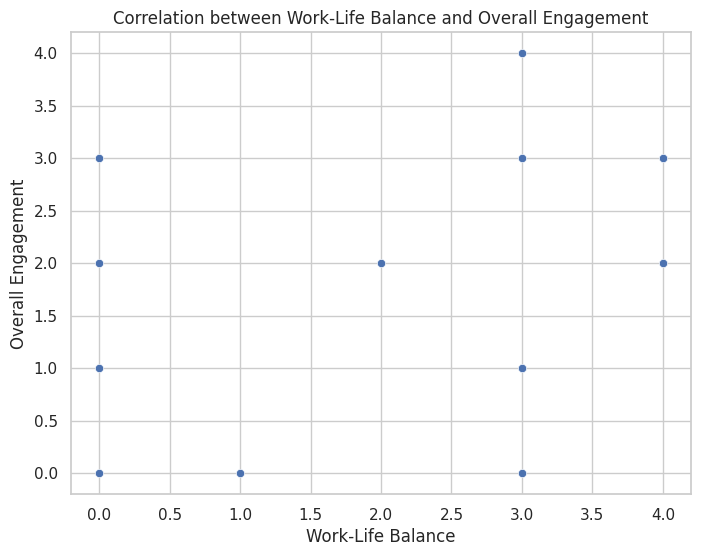

In [30]:
# correlation analysis between work life balance and overall engagement

# Calculate the correlation between 'Work-Life Balance' and 'Overall Engagement'
correlation = df['Work-Life Balance'].corr(df['Overall Engagement'])

print(f"Correlation between Work-Life Balance and Overall Engagement: {correlation}")

# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work-Life Balance', y='Overall Engagement', data=df)
plt.title('Correlation between Work-Life Balance and Overall Engagement')
plt.xlabel('Work-Life Balance')
plt.ylabel('Overall Engagement')
plt.show()

<Axes: xlabel='Department', ylabel='count'>

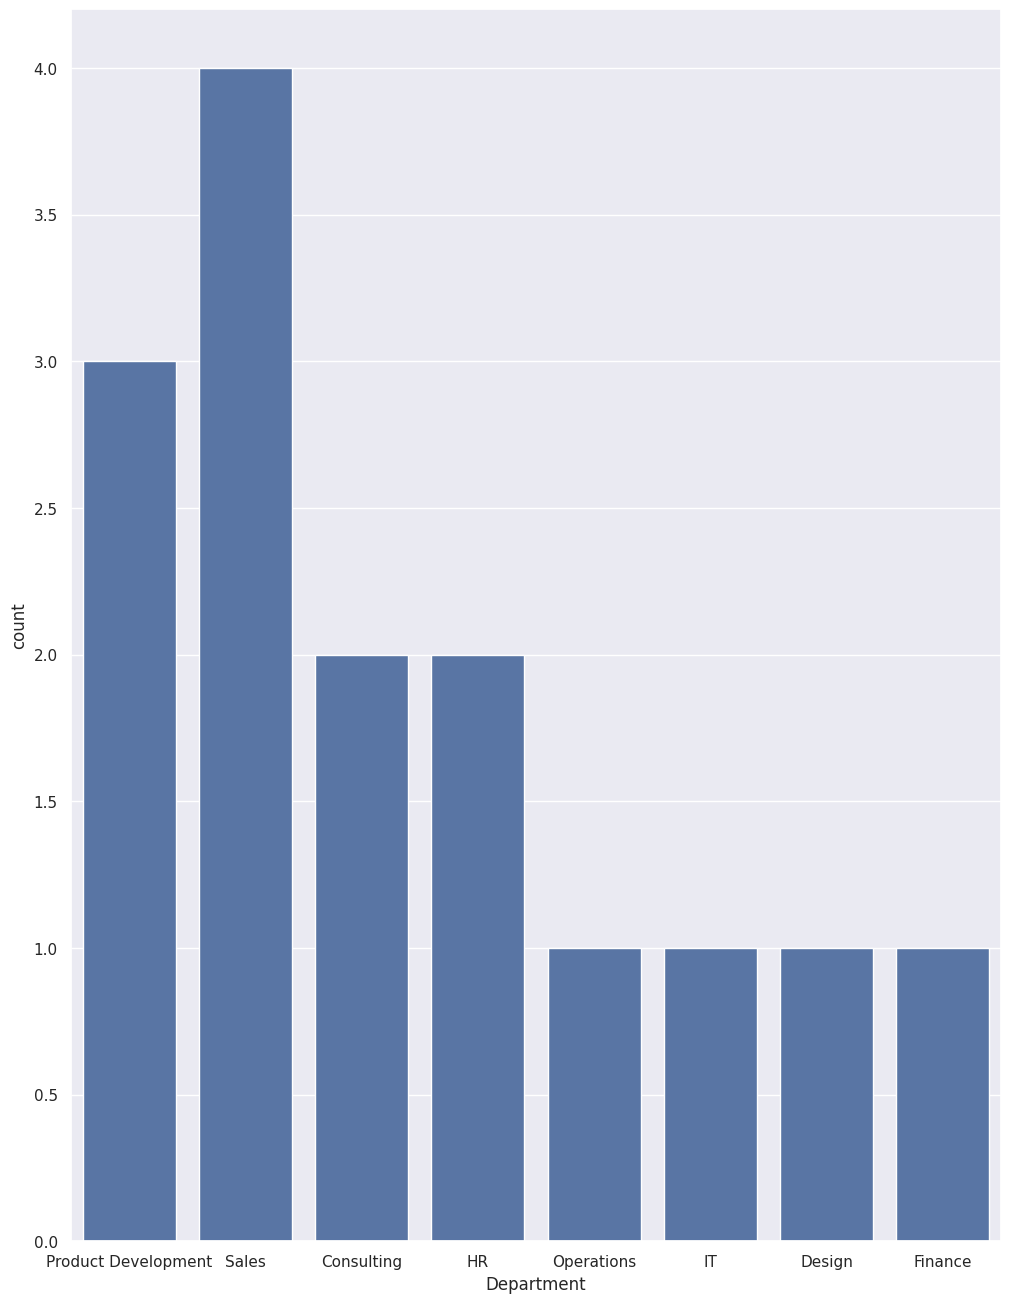

In [38]:
sns.countplot(x = 'Department', data=df)

As we can see the sales department has the highest number of employees